In [7]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads
from iads import evaluation as evale
# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust
from tqdm import tqdm


# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_detail = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")

data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


## Pour choisir notre problématique, on regarde dabord le nombre de valeurs distinctes 

### Sur synthése

In [9]:
data_synthese.loc[0:5]
np.unique(data_synthese["Groupe d'aliment"])
data_synthese.nunique()

Code AGB                                                                    2479
Code CIQUAL                                                                 2473
Groupe d'aliment                                                              11
Sous-groupe d'aliment                                                         58
Nom du Produit en Français                                                  2479
LCI Name                                                                    2477
Saisonnalité                                                                   3
Transport par avion (1 : par avion)                                            2
Livraison                                                                      5
Matériau d'emballage                                                          19
Préparation                                                                   11
DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)            221
Score unique EF (mPt/kg de p

### Sur detail ingredient

In [10]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [11]:
data_ingredient.loc[0:5]
data_ingredient.nunique()

Ciqual AGB                                                                  1038
Ciqual code                                                                 1038
Nom Français                                                                1038
Groupe d'aliment                                                              11
Sous-groupe d'aliment                                                         44
LCI Name                                                                    1036
Ingredients                                                                  213
Score unique EF (mPt/kg de produit)                                         2821
Changement climatique (kg CO2 eq/kg de produit)                             2823
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)       2824
Rayonnements ionisants (kBq U-235 eq/kg de produit)                         2831
Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)            2826
Particules (E-06 disease inc

In [12]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [13]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# Apprentissage Supervisé


## Problématiques choisies

### Moyen de transport 

In [14]:
np.unique(data_synthese["Transport par avion (1 : par avion)"], return_counts=True)

(array([0, 1], dtype=int64), array([2477,    2], dtype=int64))

Au début, on a pensé à étudier la pollution ou non des produits selon leurs moyen de transport ( avion ou non avion) car cela a un impact direct sur les emissions de C02  : mais nous avons constaté qu'il n'y a que deux transport par avion dans toutes la base de données, ce qui est insuffisant pour pouvoir appliquer la validation croisée et tester notre algorithme d'apprentissage 

### Groupe d'aliment 

In [15]:
np.unique(data_synthese["Groupe d'aliment"], return_counts=True)

(array(['aides culinaires et ingrédients divers', 'aliments infantiles',
        'boissons', 'entrées et plats composés',
        'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
        'lait et produits laitiers', 'matières grasses',
        'produits céréaliers', 'produits sucrés',
        'viandes, œufs, poissons'], dtype=object),
 array([158,  33, 219, 281, 423,  25, 220,  56, 375,  53, 636], dtype=int64))

On se propose  d'étudier donc le groupe d'aliment des produits en fonction des autres attributs

# Choix de classifieurs

# Apprentissage Supervisé 

On choisi la base de données Synthése

### Classifieur KNN 

#### Pour commencer, on va d'abord numériser nos données


In [16]:
Data = data_synthese.copy()
Data

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",mix de consommation FR,0,Glacé,PP,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


In [17]:
for i in (data_synthese.columns):
    #Si la valeur est une valeur numérique : on laisse sinon on remplace
    if data_synthese[i].dtypes== "object" :         
        Data[i].replace(np.unique(Data[i]), range(0,len(np.unique(data_synthese[i]))),inplace = True)
Data

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,383,13712,4,22,1,36,2,0,2,0,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,384,13713,4,22,0,37,2,0,2,0,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,385,13714,4,22,3,38,2,0,2,0,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,386,13715,4,22,2,39,2,0,2,0,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,284,13000,4,22,4,41,2,0,2,11,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,621,19592,6,44,2453,2464,2,0,4,12,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,622,19593,6,44,2455,2455,2,0,4,12,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,623,19594,6,44,2456,2456,2,0,4,12,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,624,19598,6,44,2458,2457,2,0,4,12,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


#### Séparer les labels des autres attributs

In [18]:
Xdata = Data.drop(columns=["Groupe d'aliment"])
Ydata = Data["Groupe d'aliment"]


#### On choisi d'appliquer la validation croisée pour mesurer la performance de notre classifier 

##### Pour le KNN

In [14]:
index = np.random.permutation(len(Xdata)) # mélange des index
print(index)
Xtrain_cross = Xdata.to_numpy()[index]
Ytrain_cross= Ydata.to_numpy()[index]
liste_accuracy =list()
niter = 10
for j in range(1, 10, 2):
    liste_accuracy =list()
    print("Pour K==", j)
    for i in tqdm(range(niter)):
        Xapp,Yapp,Xtest,Ytest = evale.crossval(Xtrain_cross, Ytrain_cross, niter, i)
        p=cl.ClassifierKNN_MC(len(Xdata.columns), j, len(np.unique(Ydata)))
        p.train(Xapp, Yapp)
        liste_accuracy.append(p.accuracy(Xtest, Ytest))
    print(liste_accuracy)

 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.60it/s]

[ 569  972 2386 ... 1190 1486 2394]
Pour K== 1


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.78it/s]

[0.9473684210526316, 0.9556451612903226, 0.967741935483871, 0.9758064516129032, 0.939516129032258, 0.9637096774193549, 0.9596774193548387, 0.967741935483871, 0.967741935483871, 0.9274193548387096]
Pour K== 3


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.61it/s]

[0.9392712550607287, 0.9475806451612904, 0.939516129032258, 0.9637096774193549, 0.9274193548387096, 0.9556451612903226, 0.9516129032258065, 0.9193548387096774, 0.9637096774193549, 0.9314516129032258]
Pour K== 5


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.87it/s]

[0.9311740890688259, 0.9153225806451613, 0.939516129032258, 0.9556451612903226, 0.9193548387096774, 0.9637096774193549, 0.939516129032258, 0.9153225806451613, 0.9637096774193549, 0.9233870967741935]
Pour K== 7


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.21it/s]

[0.9352226720647774, 0.9193548387096774, 0.9314516129032258, 0.9435483870967742, 0.9274193548387096, 0.9314516129032258, 0.9274193548387096, 0.907258064516129, 0.9475806451612904, 0.9112903225806451]
Pour K== 9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.18it/s]

[0.9230769230769231, 0.9193548387096774, 0.9153225806451613, 0.9314516129032258, 0.9032258064516129, 0.9193548387096774, 0.9233870967741935, 0.9032258064516129, 0.9435483870967742, 0.9032258064516129]


### On voit que l'accuracy est aux alentours de 0.94 pour K==1, qui représente une bonne classification de nos données ( du groupe d'aliment ) selon les autres attributs

## Perceptron 

In [19]:
index = np.random.permutation(len(Xdata))
Xtrain_cross = Xdata.to_numpy()[index]
Ytrain_cross= Ydata.to_numpy()[index]
liste_accuracy =list()
niter = 10
for i in tqdm(range(niter)):
    Xapp,Yapp,Xtest,Ytest = evale.crossval(Xtrain_cross, Ytrain_cross, niter, i)
    p=cl.ClassifierPerceptron_MC(len(Xdata.to_numpy()[0]), 0.01, 0, len(np.unique(Ydata)))
    p.train(Xapp, Yapp)
    liste_accuracy.append(p.accuracy(Xtest, Ytest))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:28<00:00,  8.83s/it]


In [20]:
print(liste_accuracy)

[0.31983805668016196, 0.33870967741935487, 0.19758064516129037, 0.27419354838709675, 0.24193548387096775, 0.22983870967741937, 0.4838709677419355, 0.32258064516129037, 0.30645161290322576, 0.43145161290322576]


### On remarque que le Perceptron n'est pas performant sur notre cas ( Accuracy moyenne de 0.3 ) 

### Arbre  de décision 

In [21]:
import graphviz as gv
index = np.random.permutation(len(Xdata))
Xtrain_cross = Xdata.to_numpy()[index]
Ytrain_cross= Ydata.to_numpy()[index]
niter = 2
for i in tqdm(range(niter)):
    Xapp,Yapp,Xtest,Ytest = evale.crossval(Xtrain_cross, Ytrain_cross, niter, i)
    Tree = cl.ClassifierArbreNumerique(Xapp.shape[1], 0.2, LNoms=Xdata.columns)
    Tree.train(Xapp, Yapp)
    # Construction de la représentation graphique (affichage)
    #On affiche juste pour un seul exemple
    """
    if (i == 0) : 
        graphe_arbre_1 = gv.Digraph(format='eps')
        Tree.affiche(graphe_arbre_1)
    """
    # Affichage du graphe obtenu:
    print("Accuracy train : ", Tree.accuracy(Xapp, Yapp))
    print("Accuracy test : ", Tree.accuracy(Xtest, Ytest))

 50%|██████████████████████████████████████████                                          | 1/2 [00:49<00:49, 49.82s/it]

Accuracy train :  0.9879032258064516
Accuracy test :  0.9096045197740112


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:35<00:00, 47.62s/it]

Accuracy train :  0.9862792574656981
Accuracy test :  0.9209677419354839


### On remarque que l'accuracy du test est aux alentours de 0.93, ce qui représente une bonne classification de nos données ( similaire à celle du KNN )

# Apprentissage non supervisé 

On va utiliser la base de données "data_etape"

In [23]:
Data = data_etape.copy()

Numériser les données :

In [24]:
for i in (data_etape.columns):
    #Si la valeur est une valeur numérique : on laisse sinon on remplace
    if data_etape[i].dtypes== "object" :         
        Data[i].replace(np.unique(Data[i]), range(0,len(np.unique(data_etape[i]))),inplace = True)
Data

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,204,12112,6,21,0,0,2.24,1,0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,384,13712,4,22,2,37,2.46,3,0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,385,13713,4,22,1,38,2.46,2,0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,386,13714,4,22,4,39,2.46,5,0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,387,13715,4,22,3,40,2.44,4,0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,622,19592,6,44,2454,2465,3.61,2454,0.277819,0.031048,...,3.780829,0.253532,0.069836,0.725770,0.148203,0.042714,2.20,3.96,3.28,5.00
2476,623,19593,6,44,2456,2456,2.04,2456,0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,2.47,1.87,1.79,2.02
2477,624,19594,6,44,2457,2457,2.48,2457,0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,3.35,1.87,1.79,2.91
2478,625,19598,6,44,2459,2458,1.90,2459,0.180150,0.039865,...,1.058970,0.871713,0.069836,0.667499,0.148203,0.042714,2.47,1.87,1.79,1.48


On commence par normaliser nos données

In [25]:
data_2D_norm =  clust.normalisation(Data)
data_2D_norm

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.082291,0.116018,0.6,0.368421,0.000000,0.000000,0.195719,0.000403,0.078718,0.025667,...,0.011282,0.032386,0.002824,0.068696,0.138819,0.035778,0.414634,0.237705,0.034301,0.455243
1,0.154901,0.132724,0.4,0.385965,0.000807,0.014937,0.262997,0.001210,0.010252,0.041719,...,0.005064,0.028010,0.005723,0.047266,0.246984,0.012922,0.254743,0.666667,0.240106,0.235294
2,0.155305,0.132734,0.4,0.385965,0.000403,0.015341,0.262997,0.000807,0.006397,0.026033,...,0.003160,0.017478,0.003571,0.029362,0.153862,0.000000,0.254743,0.666667,0.240106,0.235294
3,0.155708,0.132744,0.4,0.385965,0.001614,0.015745,0.262997,0.002017,0.010252,0.041719,...,0.005064,0.028010,0.005723,0.047266,0.246984,0.012922,0.254743,0.666667,0.240106,0.235294
4,0.156111,0.132755,0.4,0.385965,0.001210,0.016149,0.256881,0.001614,0.006397,0.026033,...,0.003160,0.017478,0.003571,0.029362,0.153862,0.000000,0.243902,0.674863,0.229551,0.225064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,0.250908,0.194116,0.6,0.771930,0.989915,0.995155,0.614679,0.989915,0.046463,0.017222,...,0.014936,0.014857,0.001814,0.050514,0.138819,0.035778,0.241192,0.759563,0.588391,1.000000
2476,0.251311,0.194126,0.6,0.771930,0.990722,0.991522,0.134557,0.990722,0.028100,0.017378,...,0.002591,0.014923,0.001814,0.046377,0.138819,0.035778,0.314363,0.188525,0.195251,0.237852
2477,0.251714,0.194136,0.6,0.771930,0.991125,0.991926,0.269113,0.991125,0.028100,0.017378,...,0.002591,0.014923,0.001814,0.046377,0.138819,0.035778,0.552846,0.188525,0.195251,0.465473
2478,0.252118,0.194178,0.6,0.771930,0.991932,0.992329,0.091743,0.991932,0.030129,0.022112,...,0.004183,0.051081,0.001814,0.046431,0.138819,0.035778,0.314363,0.188525,0.195251,0.099744


### Appliquer la méthode des k-moyennes

## Supposition 

#### Aprés avoir lu la documentation de la base de données

On suppose que les aliments sont séparer en deux catégories : Polluants et Non polluants 
Pour cela, on va donc initialiser notre algorithme avec "2" clusters

On commence par afficher tous les Centroide de toutes les données de la base

In [26]:
print("Centroide de toutes les données de la base:\n",clust.centroide(data_2D_norm))

Centroide de toutes les données de la base:
 Code AGB                                                                           0.500000
Code CIQUAL                                                                        0.223871
Groupe d'aliment                                                                   0.592177
Sous-groupe d'aliment                                                              0.542353
Nom du Produit en Français                                                         0.500000
                                                                                     ...   
Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation    0.099894
DQR - P                                                                            0.477858
DQR - TiR                                                                          0.391865
DQR - GR                                                                           0.369621
DQR - TeR                          

In [27]:
print(f"inertie de l'ensemble : {clust.inertie_cluster(data_2D_norm):1.4f}")

inertie de l'ensemble : 4003.9381


### Initialiser le cluster 

In [30]:
les_centres, l_affectation = clust.kmoyennes(2, data_2D_norm, 0.05, 100)

3633.7274292102356
iteration 1  Inertie 3567.2810621156577 Différence 66.4464
iteration 2  Inertie 3553.566110246175 Différence 13.7150
iteration 3  Inertie 3545.7499532267457 Différence 7.8162
iteration 4  Inertie 3542.0958375697683 Différence 3.6541
iteration 5  Inertie 3531.7018850778236 Différence 10.3940
iteration 6  Inertie 3518.7713017584274 Différence 12.9306
iteration 7  Inertie 3512.9907275573287 Différence 5.7806
iteration 8  Inertie 3510.958721883837 Différence 2.0320
iteration 9  Inertie 3510.605846750659 Différence 0.3529
iteration 10  Inertie 3510.5106808951296 Différence 0.0952
iteration 11  Inertie 3510.4905960749256 Différence 0.0201


In [25]:
print("Affichage des centres: ",les_centres)

Affichage des centres:  [[0.65116952 0.23317511 0.88430769 0.66672065 0.54136345 0.50725381
  0.36831804 0.5416874  0.25051991 0.03956608 0.13092544 0.03815042
  0.17696285 0.146183   0.21158325 0.05931621 0.17521282 0.03359323
  0.17704136 0.03977215 0.00283372 0.0342176  0.0932262  0.03566123
  0.17691093 0.21021697 0.29962394 0.02545505 0.15520276 0.03060782
  0.17669153 0.28428378 0.17138759 0.07889349 0.14553625 0.03099651
  0.15148085 0.07498398 0.23091864 0.06562334 0.07708955 0.09351183
  0.17238369 0.15333512 0.22787683 0.05826212 0.09266141 0.03543426
  0.16578688 0.13977852 0.20343566 0.04738566 0.10536541 0.02944183
  0.15943341 0.10990044 0.06097489 0.04020281 0.07246095 0.10387048
  0.17187305 0.08584749 0.10236664 0.03523548 0.10796465 0.02951863
  0.16752718 0.04706185 0.16170751 0.12330283 0.04019997 0.10409862
  0.17217277 0.14198643 0.05495005 0.06747946 0.06903407 0.04551892
  0.1726013  0.06552129 0.04856207 0.12611207 0.14828371 0.04473298
  0.09777408 0.23346065 

In [26]:
print("Affichage des affectations: ",l_affectation)

Affichage des affectations:  {0: [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 47, 48, 49, 50, 51, 52, 53, 84, 85, 86, 87, 88, 89, 112, 114, 194, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 306, 308, 310, 311, 312, 319, 320, 321, 322, 323, 324, 336, 337, 338, 340, 341, 350, 351, 352, 353, 354, 355, 368, 372, 373, 375, 378, 379, 380, 384, 385, 386, 387, 388, 389, 390, 391, 397, 399, 401, 410, 411, 412, 414, 415, 448, 449, 450, 451, 452, 453, 455, 456, 458, 459, 460, 466, 474, 476, 477, 491, 492, 514, 515, 566, 567, 568, 569, 571, 574, 575, 591, 592, 601, 603, 605, 606, 607, 608, 609, 665, 666, 668, 670, 671, 672, 680, 681, 682, 683, 685, 686, 706, 720, 721, 723, 725, 726, 729, 730, 731, 732, 733, 734, 735, 736, 836, 837, 838, 841, 845, 846, 858, 859, 8

In [27]:
print(len(les_centres))

2


###  Pour voir mieux à quoi ces deux clusters correspondent et vérifier notre hypothése, on décide d'étudier la différence entre les deux et comparer ce qui les distiguent

On essaie d'afficher les valeurs des attributs de ces deux centres pour voir si on peut remarquer une distinction 

In [31]:
# On crée un dataframe avec les centres
centres = pd.DataFrame(les_centres)
centres.columns = Data.columns
centres

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.457179,0.221406,0.505854,0.500916,0.490018,0.496707,0.372092,0.489920,0.048581,0.024665,...,0.015067,0.040224,0.009801,0.050959,0.164750,0.038671,0.432841,0.427503,0.400154,0.501279
1,0.639021,0.231872,0.872432,0.676881,0.532406,0.511955,0.363166,0.532726,0.265842,0.038107,...,0.060561,0.062383,0.019268,0.128097,0.180111,0.298660,0.624007,0.276162,0.270494,0.557882


In [32]:
print(len(centres.columns))

102


On a 102 attributs : on décide d'en supprimer les moins pertinents pour une meilleure visualisation et une meilleure précision 

Pour cela, nous allons faire la difference des attributs entre les cluster et garder que ceux qui ont une différence significative ( on choisi 0.15 )

In [33]:
centre_final = (centres.diff().abs().iloc[-1])
centre_final.drop(centre_final.index[centre_final.values < 0.15], inplace=True)
centre_final

Code AGB                                                                                0.181842
Groupe d'aliment                                                                        0.366577
Sous-groupe d'aliment                                                                   0.175965
Score unique EF (mPt / kg de produit) - Agriculture                                     0.217261
Changement climatique (kg CO2 eq/kg de produit) - Agriculture                           0.187015
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Consommation    0.200736
Rayonnements ionisants (kBq U-235 eq/kg de produit) - Agriculture                       0.257918
Rayonnements ionisants (kBq U-235 eq/kg de produit) - Consommation                      0.274586
Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit) - Agriculture          0.163143
Particules (E-06 disease inc./kg de produit) - Agriculture                              0.209819
Acidification terrestre et eau

In [34]:
centre_f= centres[centre_final.index]
print(len(centre_f.columns))

18


A présent: on a que 18 attributs à la place de 102

In [35]:
#On supprime le groupe d'aliment et le code AGB qui n'ont pas d'impact
centre_f.drop(columns="Code AGB", inplace=True)
centre_f.drop(columns="Groupe d'aliment",inplace = True)

C:\Users\ykemi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


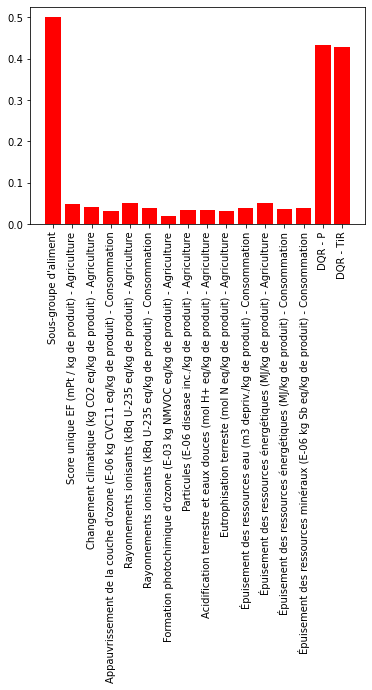

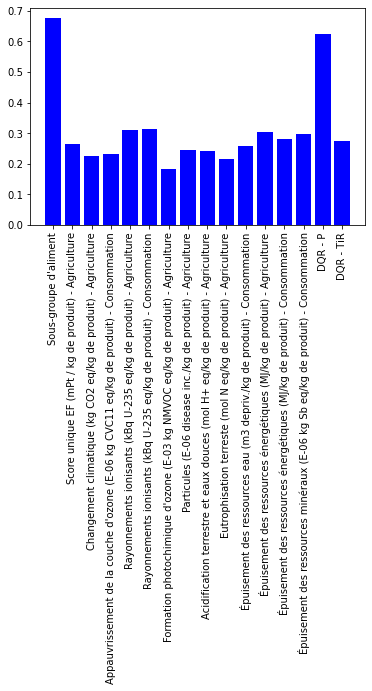

In [36]:
plt.bar(centre_f.columns,centre_f.to_numpy()[0], color ="r" )
plt.xticks(centre_f.columns, rotation=90)
plt.show()
plt.bar(centre_f.columns,centre_f.to_numpy()[1],color = "b")
plt.xticks(centre_f.columns, rotation=90)
plt.show()

### On remarque que toutes les valeurs du  deuxieme cluster sont superieure à celles du premier

# Conclusion 

On peut se dire dans ce cas qu'on posséde un cluster qui représente les produits "polluants" (Deuxiéme cluster) et un autre cluster composé de produits peu "polluant" ( Premier ) : Donc notre hypothése de départ est pertinente.

A présent, on peut se servir des ces résultats pour faire de l'inférence ( supervisé ) en comparant chaque nouvelle entrée aux deux centoides et l'affecter au cluster ( groupe ) du plus proche.